# Implementando Atención Básica #

## Menos bucles, más matrices ##

Usaremos python para esta implementación y nos apoyaremos de algunas librerias, como Pytorch y tensorflow.
Todos sabemos que python es muuy lento en sus loops, y aunque hay formas de optimizar los bucles, por ejemplo usar numba, procuramos usar métodos mas eficientes para nuestras operaciones.

Sobre los productos punto, de Wikipedia, conocemos esto:
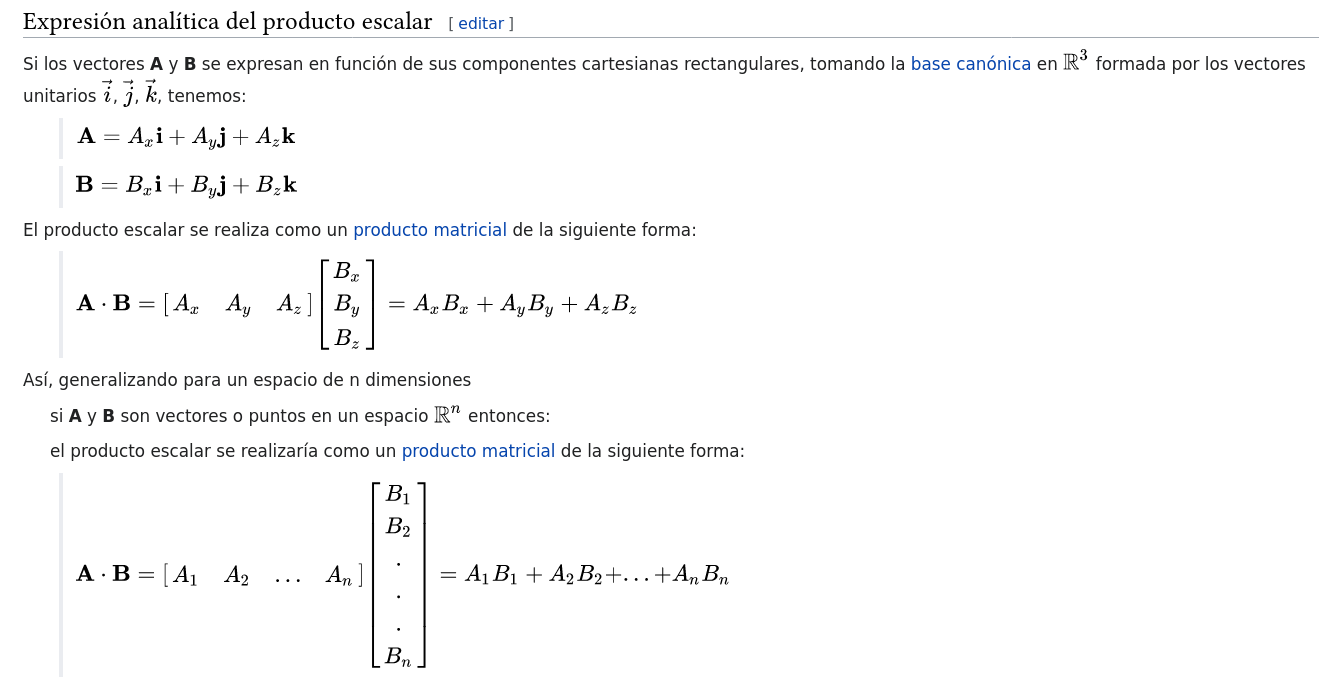

Por lo que en vez de recorrer nuestros vectores e ir haciendo el producto punto 
contra cada uno de los demás vectores, podemos simplemente recurrir a una multiplicación matricial.
$ M_s M_s^\intercal $ y de esta forma, obtenemos una matriz de los productos punto o la ponderacion de cada secuencia contra las demás.
Se puede verificar desarrollando la multiplicacion matricial de un caso particular o si se desea general, proponemos un caso particular pequeño, 2 secuencias de 3 vectores cada una, donde $S_{xy}$ representa un elemento de la secuencia, $x$ representa el índice de la secuencia y $y$ representa el indice de el elemento en la secuencia.
$ M_s M_s^\intercal = \begin{equation}
\begin{bmatrix}
S_{1,1} & S_{1,2} & S_{1,3}\\
S_{2,1} & S_{2,2} & S_{2,3}
\end{bmatrix}
\begin{bmatrix}
S_{1,1} & S_{2,1} \\
S_{1,2} & S_{2,2} \\
S_{1,3}& S_{2,3} 
\end{bmatrix}=
\begin{bmatrix}
S_{1,1}*S_{1,1} + S_{1,2}*S_{1,2} + S_{1,3}*S_{1,3} & S_{1,1}*S_{2,1} + S_{1,2}*S_{2,2} + S_{1,3}*S_{2,3} \\
S_{2,1}*S_{1,1} + S_{2,2}*S_{1,2} + S_{2,3}*S_{1,3} & S_{2,1}*S_{2,1} + S_{2,2}*S_{2,2} + S_{2,3}*S_{2,3}   
\end{bmatrix}
\end{equation} $

Hasta aqui tendriamos los pesos, solo faltaría aplicarles la función softmax, para normalizar los mismos, esta se aplicaria por filas de acuerdo a lo visto.

### Que es un tensor? ###
A modo de paréntesis, un tensor es basicamente un conjunto de matrices n dimensional.
Es análogo a que un vector es un conjunto o esta formado por escalares, a su vez, una matriz es un conjunto o esta formado por vectores....   -> un tensor es un conjunto o esta formado por matrices.

### Batch? ###
Como seguramente todos esperamos/sabemos, estos algoritmos se entrenan con un conjunto de datos, y no unicamente con un dato, entonces, podemos tener una matriz de vectores, que representan secuencias a las que queremos aplicarle esta operación de atención, entonces por que no aplicar esta operación a un conjunto de secuencias y esperar un conjunto de secuencias "traducidas" o de salida, es aqui donde aplicamos el concepto de tensores.

## El camino corto, usando pytorch ##

In [1]:
#!pip install torch #instala pytorch
import torch
import torch.nn.functional as F

def attention_torch(x):
    #Sea x nuestro tensor de secuencias
    raw_weights = torch.bmm(x, x.transpose(1, 2)) ## torch bmm aplica la multiplicacion matricial por lotes.
    #  cada matriz del tensor con sus respectivas
    weights = F.softmax(raw_weights, dim=2)#Normalizamos con la exponencial normalizada softmax
    y = torch.bmm(weights, x)#Multiplicamos por el vector, para obtener la suma ponderada que esperamos como output
    return y

## Usando tensorflow ##

In [6]:
#!pip install tensorflow install tensorflow
import tensorflow as tf 
def attention_tf(x):
    raw_weights = tf.linalg.matmul(x,tf.transpose(x,perm=[0,2,1]))
    weights = tf.nn.softmax(raw_weights,axis=2)
    y=tf.linalg.matmul(weights,x)
    return y

## Usando numpy y scipy##

In [3]:
#!pip install scipy 
import numpy as np
from scipy.special import softmax
def attention_np_scp(x):
    raw_weights= x@np.transpose(x,(0,2,1))
    weights=softmax(raw_weights,axis=(2))
    y=weights@x
    return y

In [7]:
xtf=tf.constant([[[612.0,21.0,463.02,624.0], [562.0,664.20,764.06,248.062]],[[9.0,10.0,11.0,12.0], [13.0,14.0,15.0,16.0]]])
xto=torch.tensor([[[612.0,21.0,463.02,624.0], [562.0,664.20,764.06,248.062]],[[9.0,10.0,11.0,12.0], [13.0,14.0,15.0,16.0]]])
xnpscp=np.array([[[612.0,21.0,463.02,624.0], [562.0,664.20,764.06,248.062]],[[9.0,10.0,11.0,12.0], [13.0,14.0,15.0,16.0]]])
print(" \n \nUsando pytorch: \n \n",attention_torch(xto))
print(" \n \nUsando tensorflow: \n \n",attention_tf(xtf))
print(" \n \nUsando numpy y scipy\n \n",attention_np_scp(xnpscp))
#se podria usar en tensor de torch en ambos casos, de igual forma.

 
 
Usando pytorch: 
 
 tensor([[[612.0000,  21.0000, 463.0200, 624.0000],
         [562.0000, 664.2000, 764.0600, 248.0620]],

        [[ 13.0000,  14.0000,  15.0000,  16.0000],
         [ 13.0000,  14.0000,  15.0000,  16.0000]]])
 
 
Usando tensorflow: 
 
 tf.Tensor(
[[[612.     21.    463.02  624.   ]
  [562.    664.2   764.06  248.062]]

 [[ 13.     14.     15.     16.   ]
  [ 13.     14.     15.     16.   ]]], shape=(2, 2, 4), dtype=float32)
 
 
Usando numpy y scipy
 
 [[[612.     21.    463.02  624.   ]
  [562.    664.2   764.06  248.062]]

 [[ 13.     14.     15.     16.   ]
  [ 13.     14.     15.     16.   ]]]


De esta forma, hemos implementado la operacion de atención de 3